## Key words
### 유사도, 계층도, 덴드로그램, 정규화, AgglomerativeClustering, dendrogram, linkage

### 계층적 군집 분석의 특징
- 데이터간 유사도를 기반으로 계산하며 군집의 개수가 정해져 있지 않음
- 계층적 군집분석을 실시하는 과정과 실시 후 특정 군집 개수로 데이터를 라벨링 하는 과정이 있음
- 데이터의 변동에 민감하여 학습데이터가 많을 경우 연산에 많은 시간 소요
 - 데이터 개수가 5000~1만개를 넘기는 걸 권장하지 않음

### 계층도(Dendrogram)
- 계층적 군집분석의 산출물 중 하나로 데이터간 거리 기반으로 도식화한 도표
- 계층도의 높이는 데이터 또는 군집간 거리에 비례

## sklearn - 머신러닝 전문 라이브러리
### sklrean - AgglomerativeClustering()
- 계층적 군집분석을 실시할 수 있는 sklearn의 함수
- n_clusters에 분리할 군집 개수를 설정
- affinity 인자에 데이터 간 거리계산 방법(유클리디안,멘하탄,시티블록 등), linkage에 군집 간 유사도 방법 설정

### scipy - dendrogram(), linkage()
- 계층도를 그리기 위한 scipy의 함수
- linkage() 함수로 데이터 간 거리 계산 및 군집 형성을 실시
- dendrogram() 함수로 계층도 시각화

In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt # 덴드로그램 그리기위함

In [2]:
df = pd.read_csv("iris.csv")
df.head(2) # Species는 빼고 할것 -> 클러스터 해줄때 문자열이라서

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [3]:
df_sub = df.iloc[:, :-1]
df_sub.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [4]:
model = AgglomerativeClustering(n_clusters = 3).fit(df_sub)  # fit에 독립변수 지정
# affinity='euclidean', linkage='ward' 디폴트값
model

AgglomerativeClustering(n_clusters=3)

In [5]:
model.labels_ # 중요, 몇번 클러스터에 할당 되었는지 보여줌

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [6]:
df["cluster"] = model.labels_
df.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1


In [7]:
pd.crosstab(df["Species"], df["cluster"]) # setosa가 1번, vesicolor가 0번 인걸 확인 가능

cluster,0,1,2
Species,,,
setosa,0,50,0
versicolor,49,0,1
virginica,15,0,35


In [8]:
df.groupby("cluster").mean().reset_index() # 각 클러스터별 평균값으로 어느값을 갖는지 볼수있음

,cluster,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,0,5.920312,2.751562,4.420312,1.434375
1,1,5.006000,3.428000,1.462000,0.246000
2,2,6.869444,3.086111,5.769444,2.105556


덴드로그램 그려보기(ProDS 시험에선 잘안나옴)

In [10]:
link = linkage(df_sub, method = "ward") #  데이터 간 거리 계산 및 군집 형성을 실시
link

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

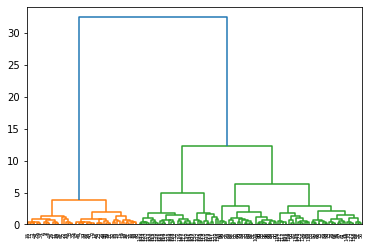

In [11]:
plt.figure() # 나는 그림을 그릴거야
dendrogram(link) # 덴드로그램으로 그릴거야
plt.show() # 보여줘
# 세로가 거리

### 1. 당뇨병 여부(Outcome) 변수를 제외한 나머지 변수를 입력으로 하고 계층적 군집분석을 실시했을 때 3번 군집의 인슐린(Insulin) 평균은?
- diabete.csv
- 4개의 군집으로 Ward, Euclidean 방법 사용

In [12]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

In [14]:
df = pd.read_csv("diabetes.csv")
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [15]:
df_sub = df.iloc[:, :-1]
df_sub.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [16]:
model = AgglomerativeClustering(n_clusters=4).fit(df_sub)
model

AgglomerativeClustering(n_clusters=4)

In [17]:
df_sub["cluster"] = model.labels_
df_sub.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,1


In [18]:
df_c3 = df_sub.loc[df_sub["cluster"] == 3, ]
df_c3.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster
3,1,89,66,23,94,28.1,0.167,21,3
6,3,78,50,32,88,31.0,0.248,26,3


In [19]:
df_c3["Insulin"].mean()

85.05

- 정규화 여부가 문제 포함되어있지않으므로 실제로할때는 정규화한 후에 실시해야 할 수도 있음

### 2. 당뇨병 여부(Outcome) 변수를 제외한 나머지 변수를 입력으로 하고 계층적 군집분석을 실시했을 때 6개의 군집으로 분할하는 경우 군집 개수가 가장 큰 군집의 행 개수는?
- diabete.csv
- Ward, Euclidean 방법사용
- Pregnancie가 0이면서 BMI가 0보다 큰 데이터만 사용

In [20]:
df = pd.read_csv("diabetes.csv")
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [21]:
df_sub = df.iloc[:, :-1]
df_sub.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [22]:
df_sub2 = df_sub.loc[(df["Pregnancies"] == 0) & (df["BMI"] > 0),]
df_sub2.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,0,137,40,35,168,43.1,2.288,33
16,0,118,84,47,230,45.8,0.551,31


In [23]:
model = AgglomerativeClustering(n_clusters=6).fit(df_sub2)

In [36]:
df_sub2["cluster"] = model.labels_
df_sub2.head(2)

C:\Users\user\AppData\Local\Temp/ipykernel_18704/3423603972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub2["cluster"] = model.labels_


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster
4,0,137,40,35,168,43.1,2.288,33,3
16,0,118,84,47,230,45.8,0.551,31,3


In [39]:
pd.crosstab(df_sub2["cluster"], df_sub2["Pregnancies"]) #정답맞춤 44

Pregnancies,0
cluster,
0,44
1,33
2,3
3,13
4,9
5,6


정답

In [40]:
# 나머지는 위와 유사
df_sub2["cluster"].value_counts()

0    44
1    33
3    13
4     9
5     6
2     3
Name: cluster, dtype: int64

### 3. 당뇨병 여부(Outcome) 변수를 제외한 나머지 변수를 입력으로 하고 계층적 군집분석을 실시했을 때 6개의 군집으로 분할하는 경우 1번과 2번 군집의 유클리드 거리는 얼마인가?
- diabete.csv
- Ward, Euclidean 방법 사용
- Pregnancies가 0이면서 BMI가 0보다 큰 데이터만 사용
- 각 군집의 값 요약은 평균을 사용

In [41]:
df = pd.read_csv("diabetes.csv")
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [42]:
df_sub = df.iloc[:, :-1]
df_sub.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [43]:
df_sub2 = df_sub.loc[(df["Pregnancies"] == 0) & (df["BMI"] > 0),]
df_sub2.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,0,137,40,35,168,43.1,2.288,33
16,0,118,84,47,230,45.8,0.551,31


In [44]:
model = AgglomerativeClustering(n_clusters=6).fit(df_sub2)

In [45]:
df_sub2["cluster"] = model.labels_
df_sub2.head(2)

C:\Users\user\AppData\Local\Temp/ipykernel_18704/3423603972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub2["cluster"] = model.labels_


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster
4,0,137,40,35,168,43.1,2.288,33,3
16,0,118,84,47,230,45.8,0.551,31,3


In [47]:
df_cl = df_sub2.groupby("cluster").mean().reset_index()
df_cl

,cluster,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,0.0,122.840909,74.886364,15.795455,0.318182,32.659091,0.508614,31.000000
1,1,0.0,109.121212,74.666667,30.939394,94.424242,36.978788,0.455333,24.060606
2,2,0.0,174.333333,79.333333,35.333333,556.000000,43.400000,0.573667,23.333333
3,3,0.0,134.153846,67.538462,31.076923,195.153846,35.400000,0.682615,25.076923
4,4,0.0,125.555556,0.000000,0.000000,0.000000,34.522222,0.505000,28.444444
5,5,0.0,156.000000,73.333333,33.333333,273.666667,41.300000,0.451500,31.166667


In [48]:
df_cl = df_cl.iloc[:, 1:] # cluster값 필요없어서 제거
df_cl

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,122.840909,74.886364,15.795455,0.318182,32.659091,0.508614,31.000000
1,0.0,109.121212,74.666667,30.939394,94.424242,36.978788,0.455333,24.060606
2,0.0,174.333333,79.333333,35.333333,556.000000,43.400000,0.573667,23.333333
3,0.0,134.153846,67.538462,31.076923,195.153846,35.400000,0.682615,25.076923
4,0.0,125.555556,0.000000,0.000000,0.000000,34.522222,0.505000,28.444444
5,0.0,156.000000,73.333333,33.333333,273.666667,41.300000,0.451500,31.166667


In [49]:
df_cl_t = df_cl.transpose() # 보기편하게 하기위해서
df_cl_t.head(2)

,0,1,2,3,4,5
Pregnancies,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Glucose,122.840909,109.121212,174.333333,134.153846,125.555556,156.0


In [50]:
df_cl_t["diff"] = df_cl_t[1] - df_cl_t[2] # 컬럼 이름 1과 2 차이
df_cl_t.head(2)

,0,1,2,3,4,5,diff
Pregnancies,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Glucose,122.840909,109.121212,174.333333,134.153846,125.555556,156.0,-65.212121


In [54]:
(df_cl_t["diff"] ** 2).sum() ** 0.5

466.248496093336

정답: 466